In [52]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
@dataclass
class Charge:
    charged_kWh: float
    consumed_kWh: float
    cost: float

@dataclass
class Discharge:
    discharged_kWh: float
    delivered_kWh: float
    cost: float

@dataclass
class SimpleBattery:
    # cost (depreciation) to charge 1 kWh
    charge_cost_kWh: float = .3
    # cost (depreciation) to discharge 1 kWh
    discharge_cost_kWh: float  = 0.0
    # charge remaining in battery
    remaining_kWh: float  = 0.0
    # maximum capacity in kWh
    capacity_kWh: float  = 5.0
    # maximum kWh charged per hour
    max_charge_kWh: float = 1
    # maximum kWh discharged per hour
    max_discharge_kWh: float = 1
    # charge conversion loss in percent
    charge_loss: float = 0.07
    # discharge conversion loss in percent
    discharge_loss: float = 0.07
        
    def charge(self, network_kWh=np.inf):
        """
        charge the battery for one time unit
        """
        remaining_capacity_kWh = self.capacity_kWh - self.remaining_kWh
        consumed_kWh = min(network_kWh, self.max_charge_kWh, remaining_capacity_kWh)
        charged_kWh = consumed_kWh * (1 - self.charge_loss)

        self.remaining_kWh += charged_kWh
        cost = charged_kWh * self.charge_cost_kWh
        return Charge(charged_kWh=charged_kWh, consumed_kWh=consumed_kWh, cost=cost)
    
    def discharge(self, network_kWh=np.inf):
        """
        charge the battery for one time unit
        """
        discharged_kWh = min(
            self.remaining_kWh, 
            self.max_discharge_kWh,
            network_kWh * (1+self.discharge_loss)
        )
        delivered_kWh = discharged_kWh * (1 - self.discharge_loss)
        cost = discharged_kWh * self.discharge_cost_kWh
        self.remaining_kWh -= discharged_kWh
        return Discharge(discharged_kWh=discharged_kWh, delivered_kWh=delivered_kWh, cost=cost)
    
    def noop(self):
        """
        let the battery chill for one time unit
        """
        pass

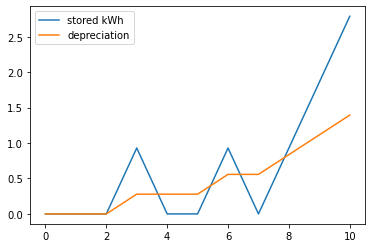

In [76]:
battery = SimpleBattery()
remaining_kWh = [0.0]
cost = [0.0]
total_cost = 0

for _ in range(10):
    roll = np.random.random()
    if roll < .5:
        # charge the battery
        result = battery.charge()
    else:
        # discharge the battery
        result = battery.discharge()
    total_cost += result.cost
    cost.append(total_cost)
    remaining_kWh.append(battery.remaining_kWh)
plt.plot(remaining_kWh, label='stored kWh')
plt.plot(cost, label='depreciation')
plt.legend()
plt.show()